# Переобучение и линейная регрессия

Для начала подключим библиотеки, которые нам понадобятся.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from matplotlib.pylab import rcParams

from IPython.core.pylabtools import figsize
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('winequalityN.csv')
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


data['type'] = labelencoder.fit_transform(data['type'])

for col in data.columns:
    mean = statistics.mean(data[col].dropna())
    data[col] = data[col].apply(lambda value: mean if pd.isnull(value) else value)

data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


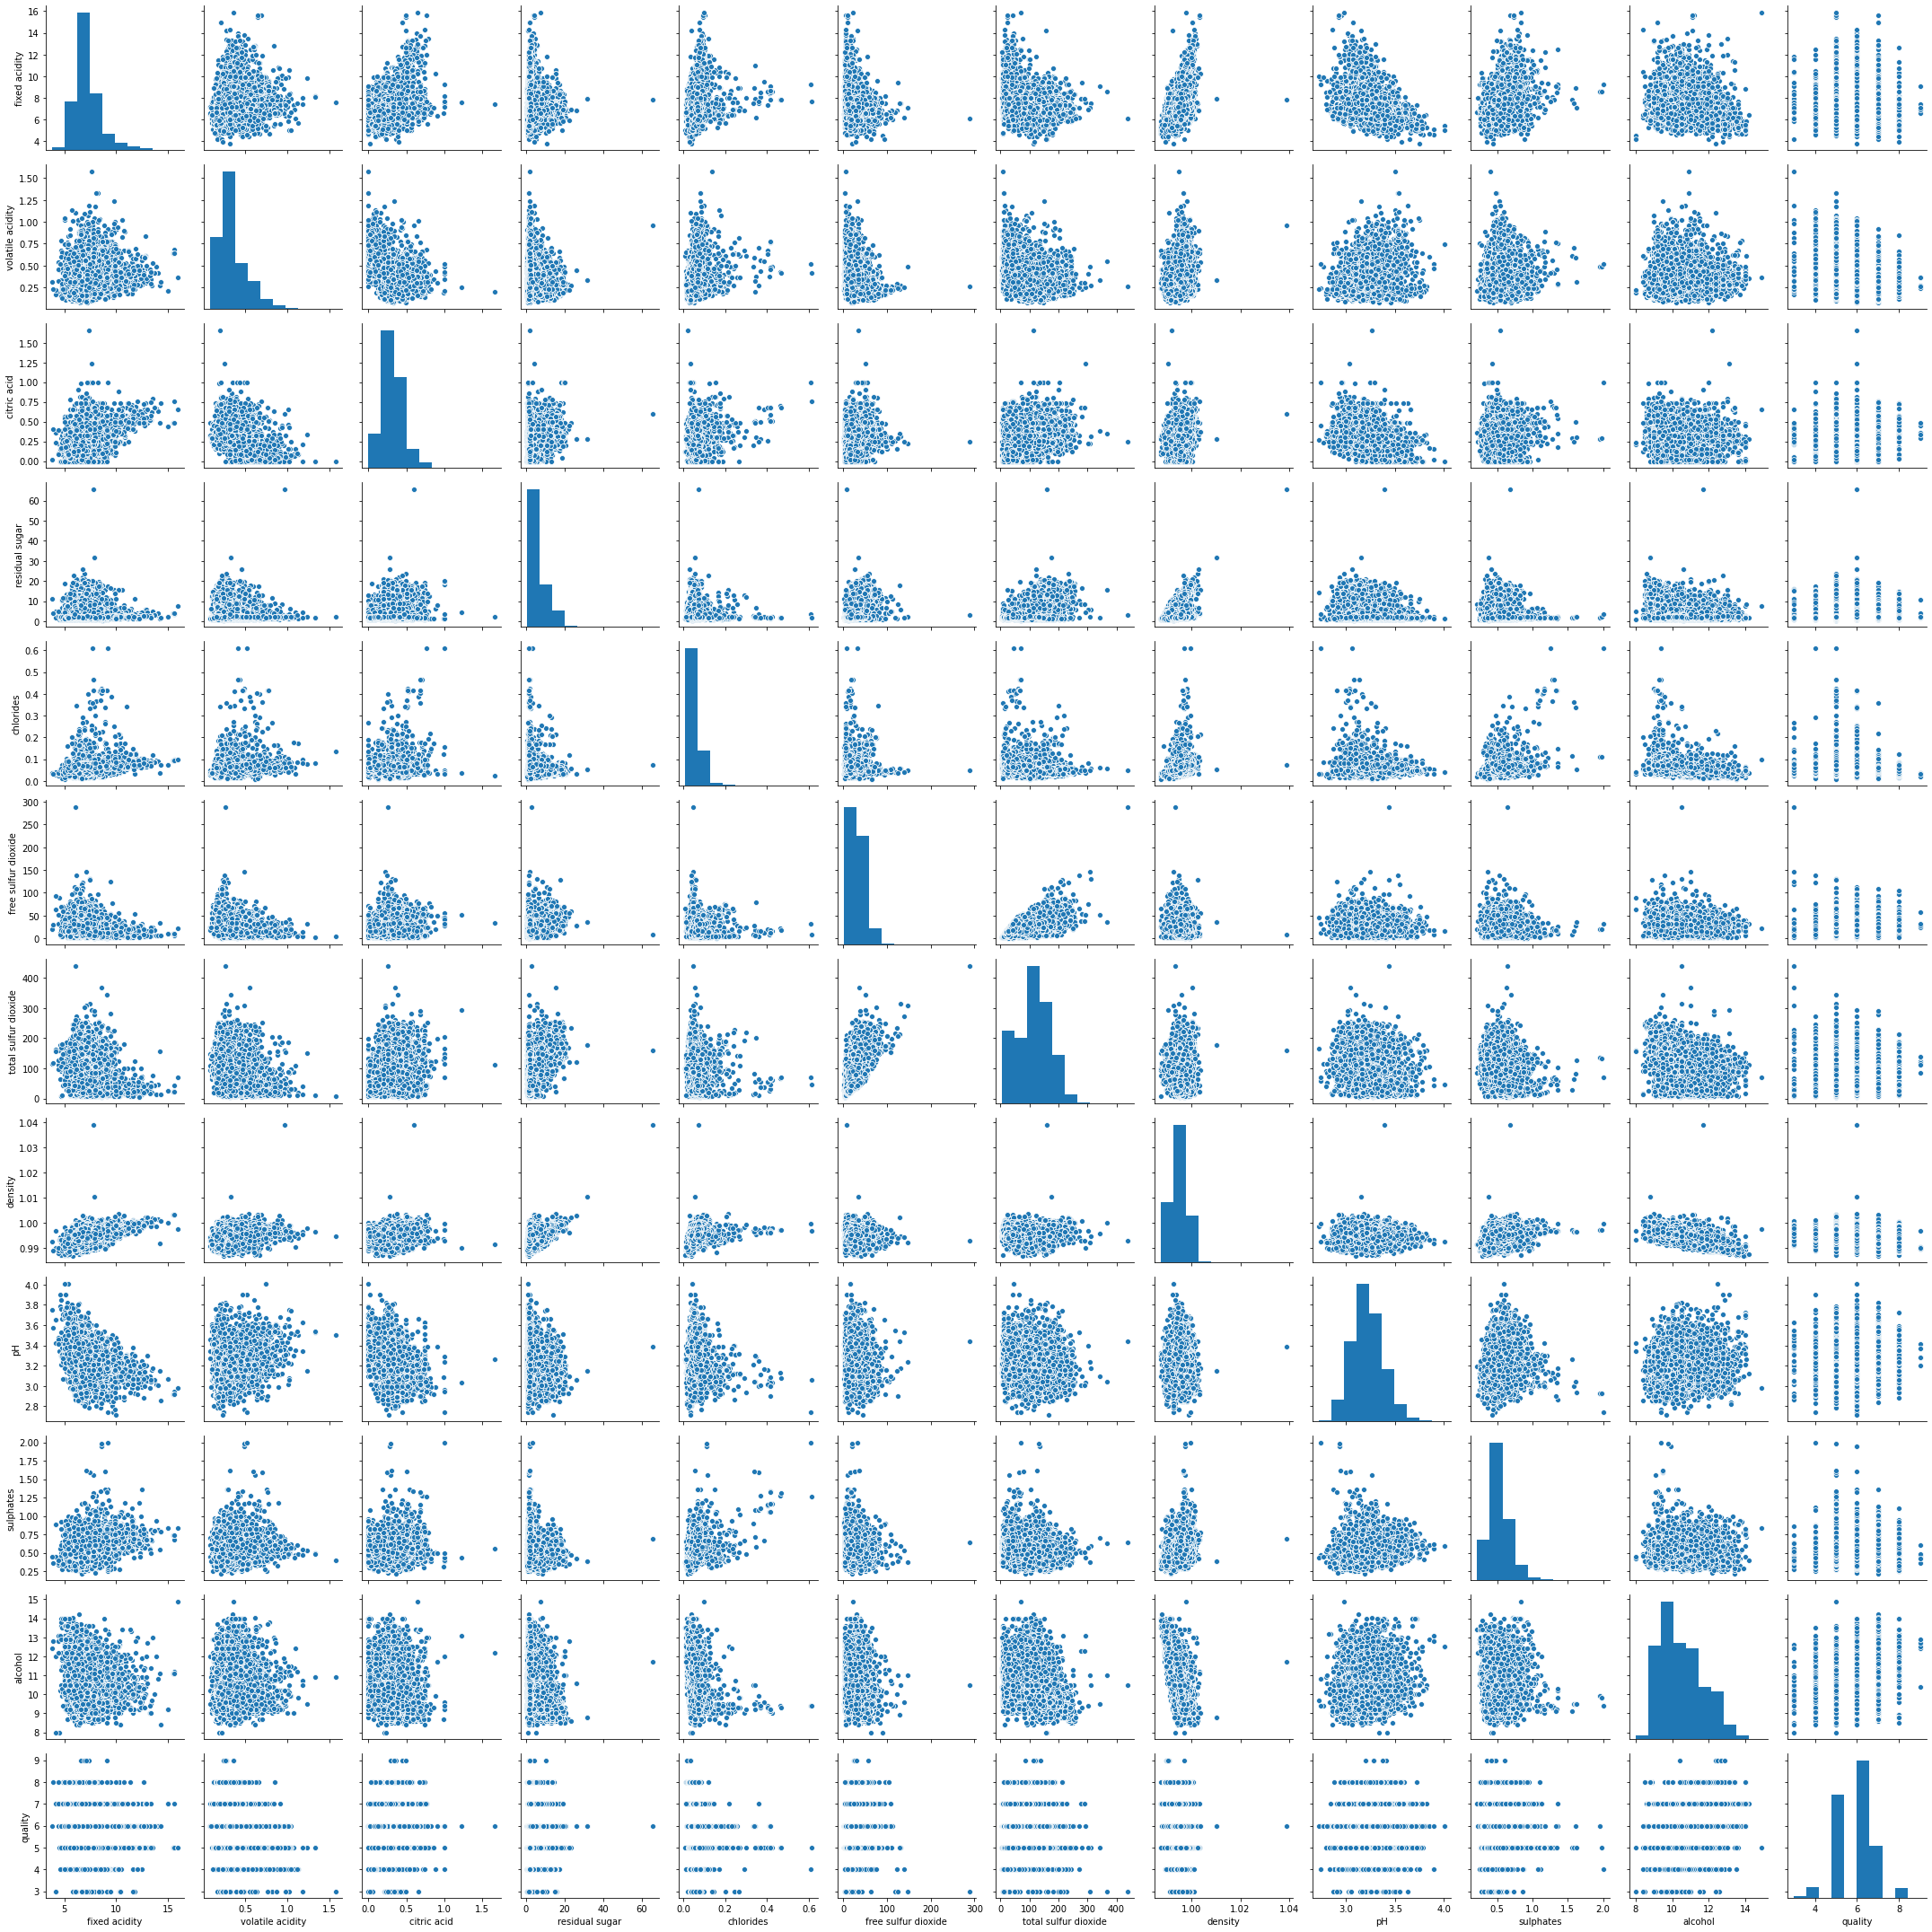

In [3]:
sns.pairplot(data[data.columns[1:]])
plt.tight_layout()
plt.show()

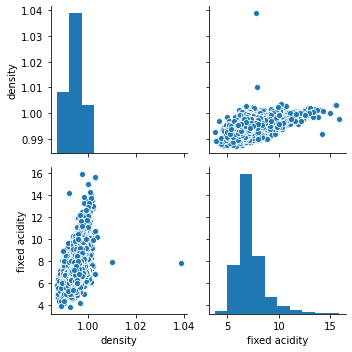

In [4]:
sns.pairplot(data[['density', 'fixed acidity']])
plt.tight_layout()
plt.show()

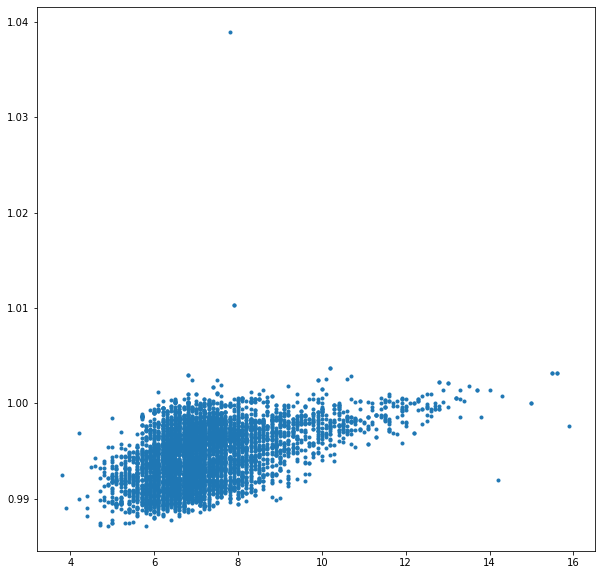

In [5]:
df = pd.DataFrame(np.column_stack([data[['fixed acidity']].values, data['density'].values]), columns=['x', 'y'])
plt.figure(figsize=(10,10))
plt.plot(df['x'], df['y'],'.')

In [6]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    df[colname] = df['x']**i
print(df.head())

     x       y    x_2      x_3        x_4          x_5            x_6  \
0  7.0  1.0010  49.00  343.000  2401.0000  16807.00000  117649.000000   
1  6.3  0.9940  39.69  250.047  1575.2961   9924.36543   62523.502209   
2  8.1  0.9951  65.61  531.441  4304.6721  34867.84401  282429.536481   
3  7.2  0.9956  51.84  373.248  2687.3856  19349.17632  139314.069504   
4  7.2  0.9956  51.84  373.248  2687.3856  19349.17632  139314.069504   

            x_7           x_8           x_9          x_10          x_11  \
0  8.235430e+05  5.764801e+06  4.035361e+07  2.824752e+08  1.977327e+09   
1  3.938981e+05  2.481558e+06  1.563381e+07  9.849303e+07  6.205061e+08   
2  2.287679e+06  1.853020e+07  1.500946e+08  1.215767e+09  9.847709e+09   
3  1.003061e+06  7.222041e+06  5.199870e+07  3.743906e+08  2.695612e+09   
4  1.003061e+06  7.222041e+06  5.199870e+07  3.743906e+08  2.695612e+09   

           x_12          x_13          x_14          x_15  
0  1.384129e+10  9.688901e+10  6.782231e+11  4.747

In [7]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],data['y'],'.')
        plt.plot(data['x'],y_pred)
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

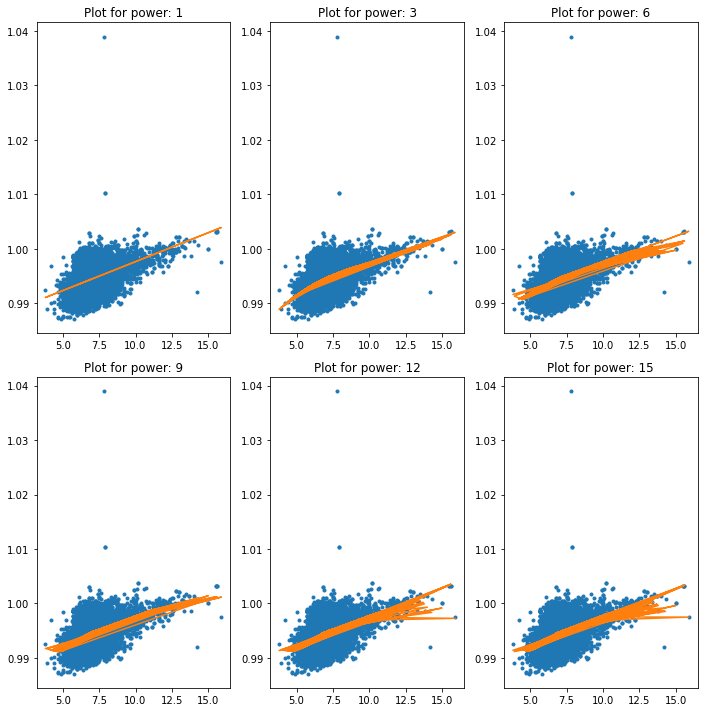

In [8]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
plt.figure(figsize=(10,10))
#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(df, power=i, models_to_plot=models_to_plot)

In [9]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,0.046,0.99,0.0011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,0.046,0.98,0.0022,-6.5e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,0.046,0.98,0.0047,-0.00036,1.1e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,0.046,0.96,0.012,-0.0017,0.00011,-2.6e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,0.046,0.98,-0.00097,0.0014,-0.00024,1.6e-05,-4e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.046,1.2,-0.15,0.046,-0.0071,0.00059,-2.5e-05,4.4e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.046,1.5,-0.44,0.15,-0.027,0.0029,-0.00018,5.9e-06,-8.2e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.046,1.1,0.015,-0.043,0.018,-0.0037,0.00042,-2.7e-05,9.1e-07,-1.3e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.045,-0.38,1.7,-0.85,0.24,-0.043,0.0049,-0.00036,1.6e-05,-4.2e-07,4.7e-09,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.045,-7.5,11,-5.8,1.8,-0.37,0.05,-0.0046,0.00028,-1.1e-05,2.6e-07,-2.6e-09,NaN,NaN,NaN,NaN,NaN


Черезмерно большие коэффициенты - переобучение.

# $L_2$-регуляризация

Минимизация не только ошибки, а ошибки+alpha*(суммы квадрат весов)

In [10]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],data['y'],'.')
        plt.plot(data['x'],y_pred)
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.90375e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


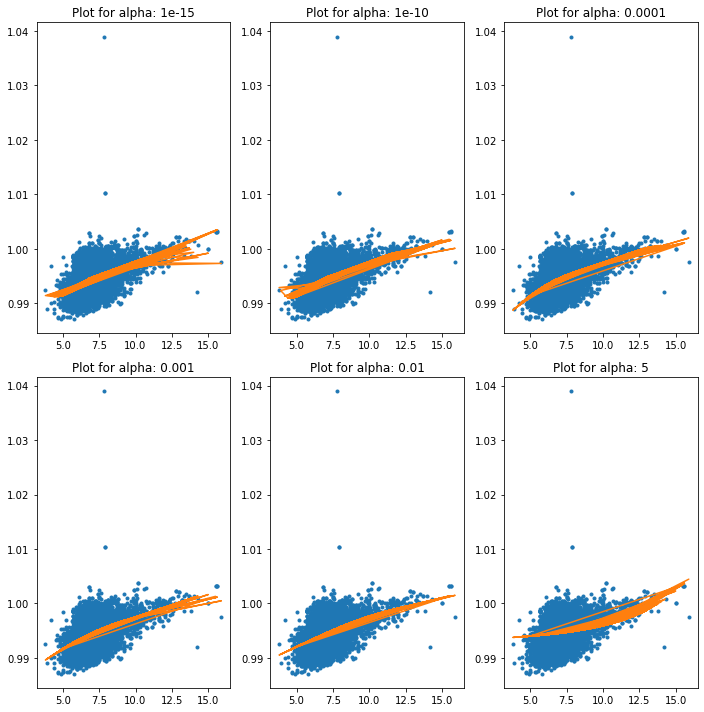

In [11]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
plt.figure(figsize=(10,10))
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(df, predictors, alpha_ridge[i], models_to_plot)

In [12]:
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.045,1.8,-1.1,0.69,-0.23,0.043,-0.0045,0.00019,5.5e-06,-3.3e-07,-4.6e-08,-1.8e-10,4.6e-10,-1.2e-11,-1.7e-12,1.1e-13,-2e-15
alpha_1e-10,0.046,1.2,-0.16,0.038,-0.0033,-5.4e-05,1.8e-05,4.3e-07,-8e-08,-4.3e-09,2.1e-10,2.7e-11,1.3e-13,-1.2e-13,-3.8e-15,6e-16,-1.4e-17
alpha_1e-08,0.046,1.1,-0.05,0.01,-0.00063,-3.1e-05,2.2e-06,2.1e-07,-4.7e-11,-8e-10,-4.5e-11,1.8e-13,1.7e-13,9.3e-15,-7.3e-17,-3.6e-17,4.9e-19
alpha_0.0001,0.046,0.98,0.0034,-6.4e-05,-9.4e-06,-3.4e-07,1.4e-08,2.6e-09,1.7e-10,4.8e-12,-2.1e-13,-3.7e-14,-2.8e-15,-1.3e-16,-2.4e-18,3.1e-19,4.6e-20
alpha_0.001,0.046,0.98,0.002,-1.2e-06,-3.4e-06,-2.2e-07,-4.7e-09,4.5e-10,5.6e-11,3.4e-12,1.2e-13,-4e-16,-4.4e-16,-3.9e-17,-2.2e-18,-5.1e-20,5.5e-21
alpha_0.01,0.046,0.99,0.0011,2.2e-05,-2.9e-07,-8e-08,-5.8e-09,-2.4e-10,-2.7e-12,5.5e-13,6.2e-14,4.2e-15,2.1e-16,7.4e-18,-3.1e-20,-3.6e-20,-4.4e-21
alpha_1,0.048,0.99,0.00027,1.3e-05,7.2e-07,3.9e-08,1.9e-09,7.7e-11,2.2e-12,-2.2e-15,-7e-15,-7.5e-16,-6e-17,-4.2e-18,-2.8e-19,-1.8e-20,-1.2e-21
alpha_5,0.051,0.99,0.00012,6.1e-06,3.9e-07,2.4e-08,1.5e-09,8.1e-11,4.1e-12,1.9e-13,8.2e-15,3e-16,6.9e-18,-1.7e-19,-4.1e-20,-4.2e-21,-3.4e-22
alpha_10,0.053,0.99,7.2e-05,3.9e-06,2.6e-07,1.7e-08,1e-09,6.2e-11,3.4e-12,1.8e-13,9.2e-15,4.5e-16,2.1e-17,9.7e-19,4.2e-20,1.6e-21,5e-23
alpha_20,0.054,0.99,4.2e-05,2.3e-06,1.6e-07,1e-08,6.8e-10,4.2e-11,2.4e-12,1.4e-13,7.6e-15,4.1e-16,2.2e-17,1.2e-18,6.5e-20,3.5e-21,1.9e-22


# $L_1$-регуляризация

Минимизация не только ошибки, а ошибки+alpha*(суммы квадрат весов)

In [13]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],data['y'],'.')
        plt.plot(data['x'],y_pred)
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022817948816076315, tolerance: 5.841229043188402e-06
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011057039592953784, tolerance: 5.841229043188402e-06
  model = cd_fast.enet_coordinate_descent(


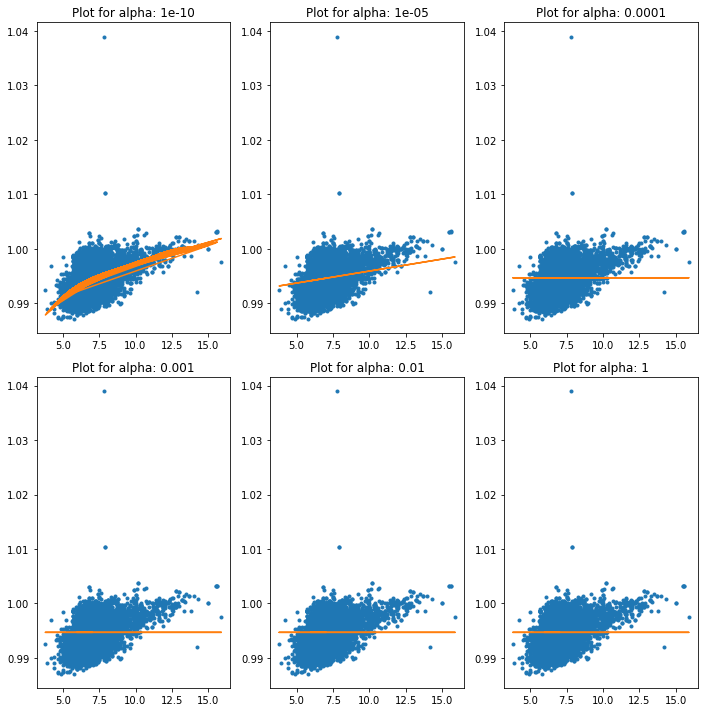

In [14]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

plt.figure(figsize=(10,10))
#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(df, predictors, alpha_lasso[i], models_to_plot)

In [15]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.046,0.97,0.0067,-0.00036,-1.8e-05,5.5e-07,1.1e-07,4.8e-09,-6.8e-11,-2.2e-11,-1.5e-12,-4.4e-14,1.4e-15,2.8e-16,1.8e-17,3.9e-19,-7e-20
alpha_1e-10,0.046,0.97,0.0062,-0.00031,-1.7e-05,2.3e-07,1.1e-07,4.3e-09,-0,-1.9e-11,-1.4e-12,-3.6e-14,0,2.3e-16,1.6e-17,2.3e-19,-4.4e-20
alpha_1e-08,0.046,0.98,0.0023,-0,-8.3e-06,-0,0,1.1e-09,4.5e-11,0,0,-0,-0,-2.5e-17,-1.7e-18,-0,-0
alpha_1e-05,0.05,0.99,0.00044,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_0.0001,0.058,0.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_0.001,0.058,0.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_0.01,0.058,0.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_1,0.058,0.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_5,0.058,0.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_10,0.058,0.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Логистическая регрессия

In [16]:
data = pd.read_csv('winequalityN.csv')
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


data['type'] = labelencoder.fit_transform(data['type'])

for col in data.columns:
    mean = statistics.mean(data[col].dropna())
    data[col] = data[col].apply(lambda value: mean if pd.isnull(value) else value)

data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7,0.27,0.36,21,0.045,45,1.7e+02,1,3,0.45,8.8,6
1,1,6.3,0.3,0.34,1.6,0.049,14,1.3e+02,0.99,3.3,0.49,9.5,6
2,1,8.1,0.28,0.4,6.9,0.05,30,97,1,3.3,0.44,10,6
3,1,7.2,0.23,0.32,8.5,0.058,47,1.9e+02,1,3.2,0.4,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47,1.9e+02,1,3.2,0.4,9.9,6


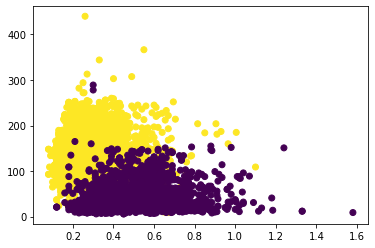

In [17]:
X = data[['volatile acidity','total sulfur dioxide']]
y = data["type"]


plt.scatter(X['volatile acidity'],X['total sulfur dioxide'], c=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Просто логистическая регрессия

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
<ipython-input-18-165adaa4454b>:13: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
<ipython-input-18-165adaa4454b>:13: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,


0.8295384615384616

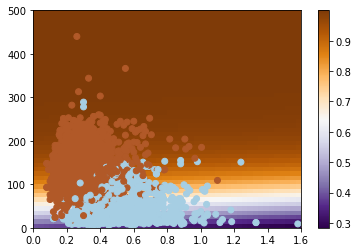

In [18]:
# Создайте классификатор логистической регрессии и обучите его на тестовой выборке
classifier = LogisticRegression(penalty='none', solver='saga')
classifier.fit(X_train, y_train)

# Построим график, который покажет, как обучилась логистическая регрессия.
def plot_boundary(clf, X, y):
    xx, yy = np.meshgrid(np.linspace(0, 1.6, 50),
                     np.linspace(0, 500, 50))
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1].reshape(xx.shape)
    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X['volatile acidity'],X['total sulfur dioxide'], c=y, cmap=plt.cm.Paired)
    plt.axis()
    plt.colorbar(image)
    
plot_boundary(classifier, X_train, y_train)
classifier.score(X_test, y_test)

Для логистической регрессии применим L1 и L2 регуляризации

Подберем степень полинома, в степень которого преобразуем текущие признаки для L1-регуляризации:

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

for i in range(1,6):
    new_classifier = Pipeline([('poly', PolynomialFeatures(degree=i)), ('logit', LogisticRegression(penalty='l1', solver='saga', max_iter=10000))])
    new_classifier.fit(X, y)
    score = new_classifier.score(X_test, y_test)
    print("{}\t{}".format(i, score))

1	0.9446153846153846
2	0.8824615384615384
3	0.7538461538461538
4	0.7538461538461538
5	0.7538461538461538


Максимум при степени = 1, выведем график

<ipython-input-18-165adaa4454b>:13: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
<ipython-input-18-165adaa4454b>:13: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,


0.9446153846153846

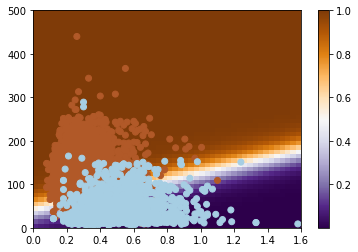

In [20]:

new_classifier = Pipeline([('poly', PolynomialFeatures(degree=1)), ('logit', LogisticRegression(penalty='l1', solver='saga', max_iter=10000))])
new_classifier.fit(X, y)
# Обучите новый классификатор на тех же данных и посмотрим, как он себя ведет в исходном пространстве признаков.

plot_boundary(new_classifier, X, y)
new_classifier.score(X_test, y_test)

и коэффициенты при степенях полинома

In [21]:
new_classifier['logit'].coef_

array([[-1.09803567, -4.94563469,  0.05849556]])

Подберем степень полинома, в степень которого преобразуем текущие признаки для L2-регуляризации:

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

for i in range(1,6):
    new_classifier = Pipeline([('poly', PolynomialFeatures(degree=i)), ('logit', LogisticRegression(penalty='l2'))])
    new_classifier.fit(X, y)
    score = new_classifier.score(X_test, y_test)
    print("{}\t{}".format(i, score))

1	0.9538461538461539
2	0.952
3	0.9464615384615385
4	0.7956923076923077
5	0.7575384615384615


Максимум от запуска к запуску при степени 1 или 2, выведем графики

Для степени 1:

<ipython-input-18-165adaa4454b>:13: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
<ipython-input-18-165adaa4454b>:13: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,


0.9538461538461539

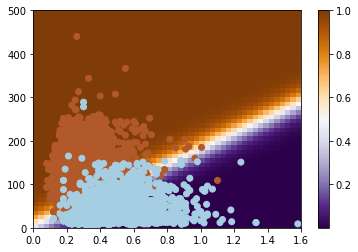

In [23]:
new_classifier = Pipeline([('poly', PolynomialFeatures(degree=1)), ('logit', LogisticRegression(penalty='l2'))])
new_classifier.fit(X, y)
# Обучите новый классификатор на тех же данных и посмотрим, как он себя ведет в исходном пространстве признаков.

plot_boundary(new_classifier, X, y)
new_classifier.score(X_test, y_test)

In [24]:
new_classifier['logit'].coef_

array([[  0.01076988, -10.5660647 ,   0.05981753]])

Для степени 2:

<ipython-input-18-165adaa4454b>:13: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
<ipython-input-18-165adaa4454b>:13: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,


0.952

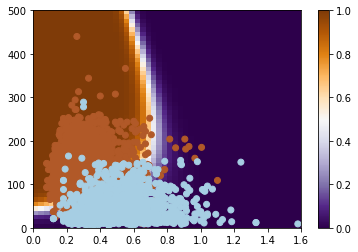

In [25]:
new_classifier = Pipeline([('poly', PolynomialFeatures(degree=2)), ('logit', LogisticRegression(penalty='l2'))])
new_classifier.fit(X, y)
# Обучите новый классификатор на тех же данных и посмотрим, как он себя ведет в исходном пространстве признаков.

plot_boundary(new_classifier, X, y)
new_classifier.score(X_test, y_test)

In [26]:
new_classifier['logit'].coef_

array([[-2.35916300e+00, -1.16088706e+00,  1.24109636e-01,
        -5.71384377e-01, -1.03319177e-01, -1.09098834e-04]])